In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# İnitializing dataset
dataFrame = pd.read_excel("merc.xlsx")

In [13]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [19]:
## Determining all data
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [25]:
## Controlling of null data
dataFrame.isnull().sum() ## => We have not null data

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

C:\Users\berka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 700x500 with 0 Axes>

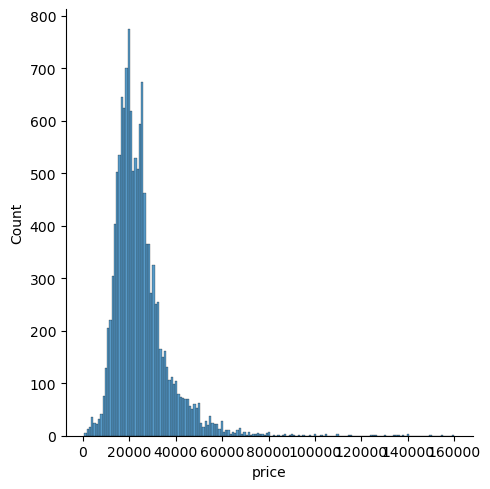

In [65]:
## Plotting the Distribution Plot
plt.figure(figsize=(7,5))
sns.displot(dataFrame["price"])

<Axes: xlabel='year', ylabel='count'>

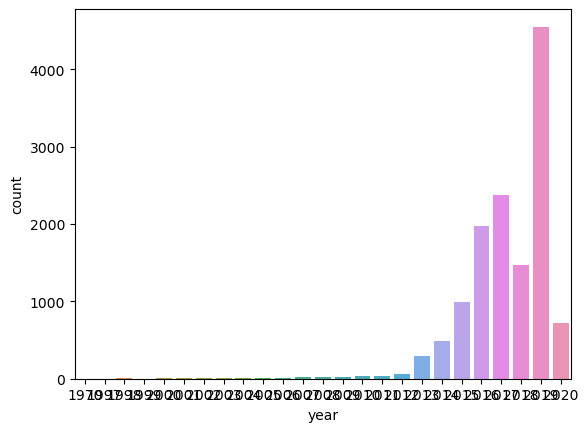

In [149]:
sns.countplot(dataFrame, x="year")

In [155]:
## Let's observe the correlation between the data.
dataFrame.corr(numeric_only=True)

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [165]:
dataFrame.corr(numeric_only=True)["price"].sort_values()

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

## Correlation Result

Mileage and mpg seem to be the reason that negatively affects the car price.

The price is directly proportional to the model year. We conclude that the newer the car, the higher the price.


<Axes: xlabel='mileage', ylabel='price'>

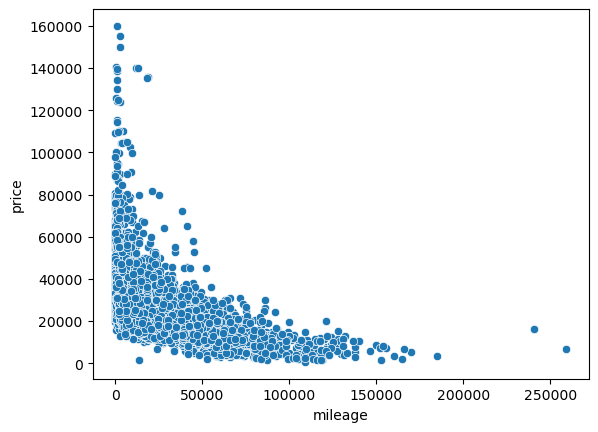

In [170]:
sns.scatterplot(x="mileage", y="price" ,data= dataFrame)

In [174]:
dataFrame.sort_values("price", ascending=False ).head(20) ## Detecting the highest price car

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


## Data Cleaning

In [183]:
## To reach a more accurate result, we will take 99.9% of the data and subtract the 0.01% from the most expensive cars.
len(dataFrame)*0.01

131.19

In [191]:
cleanedDataFrame=dataFrame.sort_values("price", ascending=False ).iloc[131:]
cleanedDataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


C:\Users\berka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 700x500 with 0 Axes>

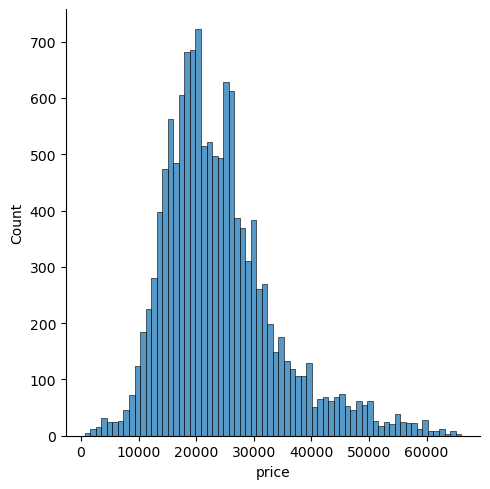

In [199]:
## We obtained a more clean dataset
plt.figure(figsize=(7,5)) 
sns.displot(cleanedDataFrame["price"])

In [225]:
# Since the data in 1970 is very high, let's remove these values ​​from the dataframe.
cleanedDataFrame.groupby("year")[['price']].mean()

,price
year,
1970,24999.000000
1997,9995.000000
1998,8605.000000
1999,5995.000000
2000,5743.333333
2001,4957.900000
2002,5820.444444
2003,4878.000000
2004,4727.615385


In [221]:
dataFrame = cleanedDataFrame
cleanedDataFrame

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0
...,...,...,...,...,...,...,...
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11765,2000,1490,Automatic,87000,265,27.2,3.2
12008,2010,1350,Manual,116126,145,54.3,2.0


In [223]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [229]:
dataFrame = dataFrame [dataFrame.year != 1970]

In [233]:
dataFrame.groupby("year")[['price']].mean()

,price
year,
1997,9995.000000
1998,8605.000000
1999,5995.000000
2000,5743.333333
2001,4957.900000
2002,5820.444444
2003,4878.000000
2004,4727.615385
2005,4426.111111


In [235]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0


In [255]:
## It will give an error because there is no numerical value in the Transmission column. For this reason, let's remove this column as well.
dataFrame = dataFrame.drop("transmission", axis = 1)

## Creating a Model

In [265]:
y= dataFrame["price"].values ## We took the prices from the dataframe and converted them into a numpy array.
x= dataFrame.drop("price", axis=1).values ## Remaining values

In [267]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650], dtype=int64)

In [269]:
x

array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

In [263]:
from sklearn.model_selection import train_test_split

In [273]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10) ## We planned as %30 Test %70 Train

In [275]:
len(x_train)

9090

In [277]:
len(x_test)

3897

In [279]:
from sklearn.preprocessing import MinMaxScaler

In [281]:
scaler = MinMaxScaler()

In [285]:
x_train = scaler.fit_transform(x_train)

In [297]:
x_test = scaler.transform(x_test)

In [309]:
## importing Tensorflow
from tensorflow.keras.models import Sequential ## for creating model
from tensorflow.keras.layers import Dense ## for creating layer

In [325]:
x_train.shape

(9090, 5)

In [327]:
model = Sequential()

model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")


In [329]:
model.fit(x=x_train, y = y_train,validation_data=(x_test,y_test) , batch_size=250, epochs=300)

Epoch 1/300
37/37 [==============================] - 1s 8ms/step - loss: 672138880.0000 - val_loss: 687754688.0000
Epoch 2/300
37/37 [==============================] - 0s 3ms/step - loss: 672089984.0000 - val_loss: 687366912.0000
Epoch 3/300
37/37 [==============================] - 0s 3ms/step - loss: 671925632.0000 - val_loss: 686325632.0000
Epoch 4/300
37/37 [==============================] - 0s 3ms/step - loss: 671442368.0000 - val_loss: 683906624.0000
Epoch 5/300
37/37 [==============================] - 0s 3ms/step - loss: 670213184.0000 - val_loss: 680536192.0000
Epoch 6/300
37/37 [==============================] - 0s 3ms/step - loss: 667484096.0000 - val_loss: 676918080.0000
Epoch 7/300
37/37 [==============================] - 0s 3ms/step - loss: 662048512.0000 - val_loss: 674729728.0000
Epoch 8/300
37/37 [==============================] - 0s 3ms/step - loss: 652185280.0000 - val_loss: 669157312.0000
Epoch 9/300
37/37 [==============================] - 0s 3ms/step - loss: 6356864

In [331]:
dataLoss = pd.DataFrame(model.history.history)

In [333]:
dataLoss.head()

,loss,val_loss
0,672138880.0,687754688.0
1,672089984.0,687366912.0
2,671925632.0,686325632.0
3,671442368.0,683906624.0
4,670213184.0,680536192.0


<Axes: >

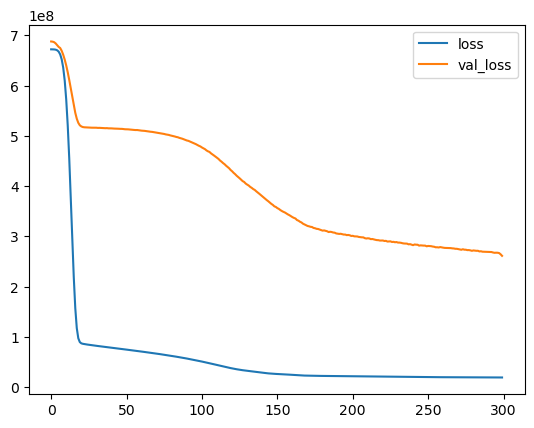

In [335]:
dataLoss.plot()

In [337]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [339]:
predictionArray = model.predict(x_test)
predictionArray

122/122 [==============================] - 0s 962us/step


array([[11516.263],
       [11516.33 ],
       [11515.659],
       ...,
       [11515.571],
       [11516.474],
       [11515.838]], dtype=float32)

In [341]:
mean_absolute_error(y_test,predictionArray)

13053.965701531226

In [343]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,2017.285516,24074.855779,22133.367367,129.676215,55.438392,2.051059
std,2.189633,9866.601115,21197.472376,65.167429,15.025902,0.532313
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17355.000000,6320.000000,125.000000,45.600000,1.700000
50%,2018.000000,22299.000000,15371.000000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31986.500000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [349]:
13053.965701531226 / 24074.855779 * 100

54.22240457580614

In [351]:
## We have %54.22 difference

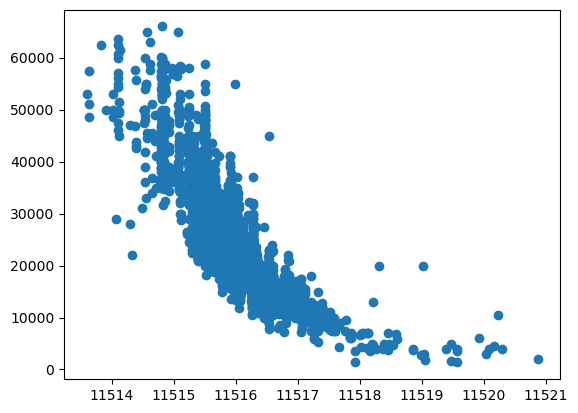

In [369]:
plt.scatter(predictionArray,y_test)

In [371]:
dataFrame.iloc[2]

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

In [377]:
newCarDataSeries = dataFrame.drop("price",axis=1).iloc[2]

In [379]:
newCarDataSeries

year          2020.0
mileage       3999.0
tax            145.0
mpg             28.0
engineSize       4.0
Name: 3191, dtype: float64

In [381]:
newCarDataSeries = scaler.transform(newCarDataSeries.values.reshape(-1,5))

In [383]:
model.predict(newCarDataSeries)

1/1 [==============================] - 0s 21ms/step


array([[61205.94]], dtype=float32)